In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import yfinance as yf

In [5]:
btc_ticker=yf.Ticker("BTC-USD")

In [6]:
btc=btc_ticker.history(period="max")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-25 00:00:00+00:00,65375.875000,66112.421875,63473.472656,65777.226562,38315761670,0.0,0.0
2024-07-26 00:00:00+00:00,65771.812500,68207.601562,65743.765625,67912.062500,30488630457,0.0,0.0
2024-07-27 00:00:00+00:00,67911.812500,69398.507812,66705.218750,67813.335938,34691905492,0.0,0.0


In [7]:
pip install neuralprophet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [8]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [9]:
import pickle

In [10]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3604 entries, 2014-09-17 00:00:00+00:00 to 2024-07-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3604 non-null   float64
 1   High          3604 non-null   float64
 2   Low           3604 non-null   float64
 3   Close         3604 non-null   float64
 4   Volume        3604 non-null   int64  
 5   Dividends     3604 non-null   float64
 6   Stock Splits  3604 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 225.2 KB


In [11]:
btc_reset = btc.reset_index()
btc_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604 entries, 0 to 3603
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3604 non-null   datetime64[ns, UTC]
 1   Open          3604 non-null   float64            
 2   High          3604 non-null   float64            
 3   Low           3604 non-null   float64            
 4   Close         3604 non-null   float64            
 5   Volume        3604 non-null   int64              
 6   Dividends     3604 non-null   float64            
 7   Stock Splits  3604 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 225.4 KB


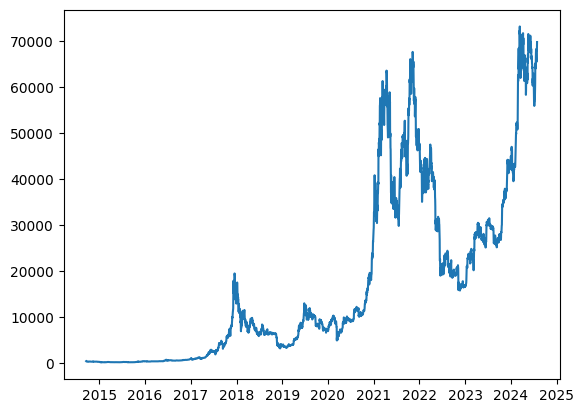

In [12]:
plt.plot(btc_reset['Date'],btc_reset['Close'])
plt.show()

In [13]:
btc_reset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
btc_final=btc_reset[['ds','y']]
btc_final.head()

,ds,y
0,2014-09-17 00:00:00+00:00,457.334015
1,2014-09-18 00:00:00+00:00,424.440002
2,2014-09-19 00:00:00+00:00,394.795990
3,2014-09-20 00:00:00+00:00,408.903992
4,2014-09-21 00:00:00+00:00,398.821014


In [14]:
btc_train=btc_final.iloc[:len(btc_final)-365]
btc_test=btc_final.iloc[len(btc_final)-365:]
print(btc_train.shape)
print(btc_test.shape)

(3239, 2)
(365, 2)


In [15]:
model_np=NeuralProphet(batch_size=13)
model_np.fit(btc_train,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.969% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.969% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/238 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.347841,0.0,27824.257812,35864.234375,0.347366,0.0,0
1,0.057115,0.0,7415.228516,9900.228516,0.057115,0.0,1
2,0.051771,0.0,6739.066406,9423.481445,0.051662,0.0,2
3,0.046985,0.0,6291.109375,8742.929688,0.046891,0.0,3
4,0.044001,0.0,6092.236328,8457.541992,0.043856,0.0,4
...,...,...,...,...,...,...,...
995,0.017970,0.0,3603.226074,5124.273926,0.018172,0.0,995
996,0.018023,0.0,3566.951172,5053.951660,0.017963,0.0,996
997,0.017982,0.0,3556.192627,5077.735840,0.017924,0.0,997
998,0.018004,0.0,3565.172363,5078.631836,0.017946,0.0,998


In [16]:
# future = model_np.make_future_dataframe(btc_final, periods=365)
forecast=model_np.predict(btc_final)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2014-09-17,457.334015,441.003418,2556.580322,-2052.158203,-63.418552
1,2014-09-18,424.440002,629.595703,2542.658447,-2056.880859,143.818115
2,2014-09-19,394.795990,0.034317,2528.736816,-2056.933594,-471.768860
3,2014-09-20,408.903992,716.341431,2514.814941,-2052.345459,253.871857
4,2014-09-21,398.821014,501.697113,2500.893311,-2043.147095,43.950916


In [17]:
plot1 = model_np.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [18]:
from statsmodels.tools.eval_measures import rmse

In [19]:
predictions = forecast.iloc[-365:]['yhat1']

In [20]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,btc_test['y']))
print("Mean Value of Test Dataset:", btc_test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  39432.53450955249
Mean Value of Test Dataset: 48472.61666309932


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(btc_test.y, predictions)
print("R-squared:", r2)

R-squared: -5.1102313942963296
